In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('seaborn-whitegrid')

OSError: 'seaborn-whitegrid' is not a valid package style, path of style file, URL of style file, or library style name (library styles are listed in `style.available`)

In [3]:
df = pd.read_excel('WorkPlaceSatisfactionSurveyData.xlsx')

In [4]:
df.head()

,number,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,healtcare,holidayCabin,gym,muscleCare
0,1,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,NaN,NaN,NaN,NaN
1,2,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,NaN,NaN,NaN,NaN
2,3,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,1.0,NaN,NaN,NaN
3,4,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,1.0,NaN,NaN,NaN
4,5,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,1.0,NaN,NaN,NaN


In [5]:
df=df.drop(['number'], axis=1)

In [6]:
df=df.drop(['healtcare', 'holidayCabin', 'gym', 'muscleCare'], axis=1)

In [7]:
df.head()

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2


In [8]:
df[['age', 'gender']].describe()

,age,gender
count,82.000000,82.000000
mean,37.951220,1.231707
std,9.773866,0.424519
min,20.000000,1.000000
25%,31.000000,1.000000
50%,37.500000,1.000000
75%,44.000000,1.000000
max,61.000000,2.000000


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


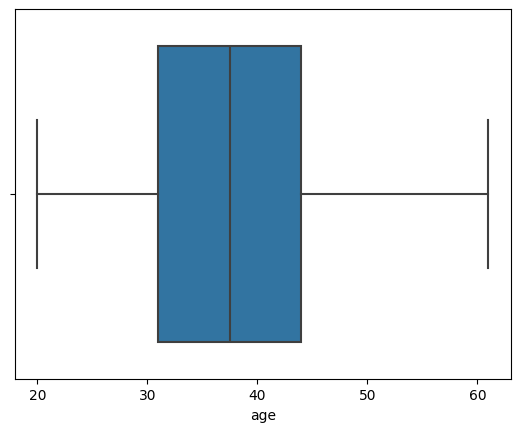

In [38]:
ax3 = sns.boxplot(x = df['age'])

In [10]:
df.nlargest(n = 3, columns= 'Age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
56,1,61,2,2.0,36.0,3119,2,NaN,2,1,5
32,1,59,2,3.0,15.0,6278,4,4.0,5,4,4
13,1,58,2,3.0,21.0,3587,4,5.0,4,1,3


In [11]:
df.nsmallest(n = 3, columns= 'age')

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks
58,1,20,1,2.0,1.0,2261,3,4.0,3,2,3
29,1,21,1,NaN,NaN,1949,4,4.0,3,3,2
30,1,21,1,3.0,1.0,2340,4,5.0,3,4,2


In [12]:
df1 = pd.crosstab(df['gender'], 'Count')

In [13]:
df1

col_0,Count
gender,
1,63
2,19


In [14]:
df1.index = ['Male', 'Female']
df1

col_0,Count
Male,63
Female,19


In [15]:
df1.columns.name = 'Gender'
df1

Gender,Count
Male,63
Female,19


<Axes: >

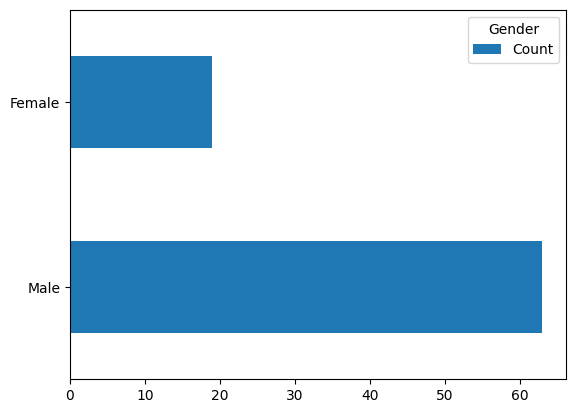

In [16]:
df1.plot.barh()

Text(0.5, 0, 'Count')

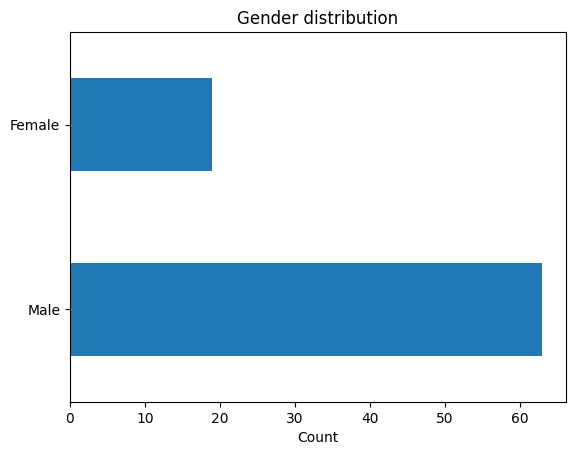

In [17]:
df1.plot.barh(legend = False)

plt.title('Gender distribution')
plt.xlabel('Count')

In [18]:
sum(df1['Count'])

82

Text(0.5, 0, 'Count, N = 82')

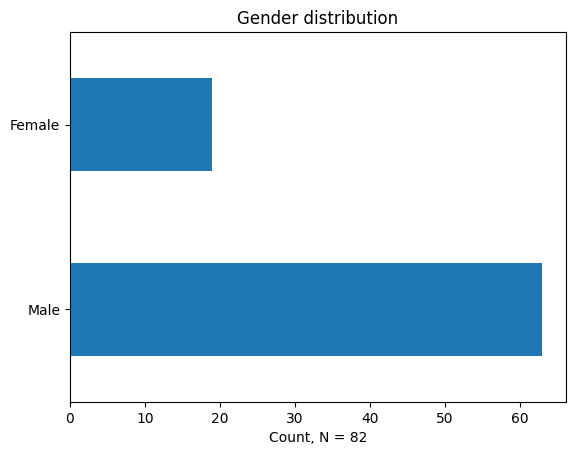

In [19]:
df1.plot.barh(legend = False)

plt.title('Gender distribution')
plt.xlabel('Count, N = 82')

In [20]:
df2 = pd.crosstab(df['gender'], 'Count')
df2['%'] = df2['Count'] / df2['Count'].sum() * 100
df2.index = ['Male', 'Female']
df2.columns.name = 'Gender'
df2

Gender,Count,%
Male,63,76.829268
Female,19,23.170732


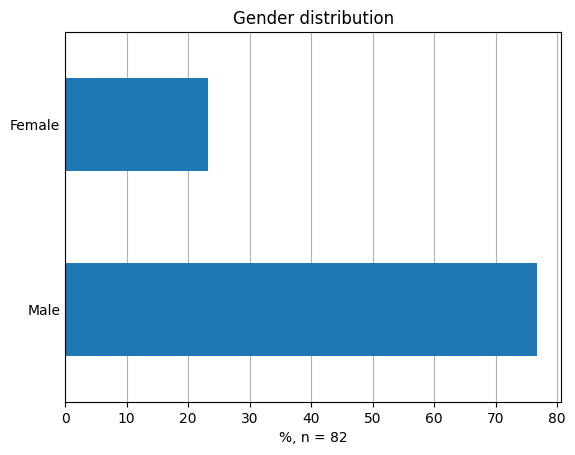

In [21]:
df2['%'].plot.barh(zorder = 2)

plt.title('Gender distribution')
plt.xlabel('%, n = ' + str(df2['Count'].sum()))
plt.grid(axis= 'x')
plt.tick_params(axis= 'y', length = 0)

In [22]:
min(df['age'])

20

In [23]:
max(df['age'])

61

In [24]:
bins = [10, 20, 30, 40, 50, 60, 70]

In [25]:
df['age_group'] = pd.cut(df['age'], bins= bins)

In [26]:
df

,gender,age,family,education,years_of_service,salary,sat_management,sat_colleques,sat_workingEnvironment,sat_salary,sat_tasks,age_group
0,1,38,1,1.0,22.0,3587,3,3.0,3,3,3,"(30, 40]"
1,1,29,2,2.0,10.0,2963,1,5.0,2,1,3,"(20, 30]"
2,1,30,1,1.0,7.0,1989,3,4.0,1,1,3,"(20, 30]"
3,1,36,2,1.0,14.0,2144,3,3.0,3,3,3,"(30, 40]"
4,1,24,1,2.0,4.0,2183,2,3.0,2,1,2,"(20, 30]"
...,...,...,...,...,...,...,...,...,...,...,...,...
77,1,22,1,3.0,0.0,1598,4,4.0,4,3,4,"(20, 30]"
78,1,33,1,1.0,2.0,1638,1,3.0,2,1,2,"(30, 40]"
79,1,27,1,2.0,7.0,2612,3,4.0,3,3,3,"(20, 30]"
80,1,35,2,2.0,16.0,2808,3,4.0,3,3,3,"(30, 40]"


In [27]:
df[['age', 'gender','age_group']]

,age,gender,age_group
0,38,1,"(30, 40]"
1,29,1,"(20, 30]"
2,30,1,"(20, 30]"
3,36,1,"(30, 40]"
4,24,1,"(20, 30]"
...,...,...,...
77,22,1,"(20, 30]"
78,33,1,"(30, 40]"
79,27,1,"(20, 30]"
80,35,1,"(30, 40]"


In [28]:
df3 = pd.crosstab(df['age_group'], 'Count')
df3.columns.name = ''

n = df3['Count'].sum()
df3['%'] = df3 / n * 100

df3

,Count,%
age_group,,
"(10, 20]",1,1.219512
"(20, 30]",19,23.170732
"(30, 40]",35,42.682927
"(40, 50]",16,19.512195
"(50, 60]",10,12.195122
"(60, 70]",1,1.219512


In [29]:
type(df3.index.values[0])

pandas._libs.interval.Interval

In [30]:
df3.index = df3.index.astype(str)
df3.loc['Total'] = df3.sum()
df3

,Count,%
age_group,,
"(10, 20]",1.0,1.219512
"(20, 30]",19.0,23.170732
"(30, 40]",35.0,42.682927
"(40, 50]",16.0,19.512195
"(50, 60]",10.0,12.195122
"(60, 70]",1.0,1.219512
Total,82.0,100.000000


In [31]:
type(df3.index.values[0])

str

In [32]:
df3.style.format({'Count': '{:.0f}', '%': '{:.1f} %'})

,Count,%
age_group,,
"(10, 20]",1,1.2 %
"(20, 30]",19,23.2 %
"(30, 40]",35,42.7 %
"(40, 50]",16,19.5 %
"(50, 60]",10,12.2 %
"(60, 70]",1,1.2 %
Total,82,100.0 %


Text(0, 0.5, 'Count, n = 82')

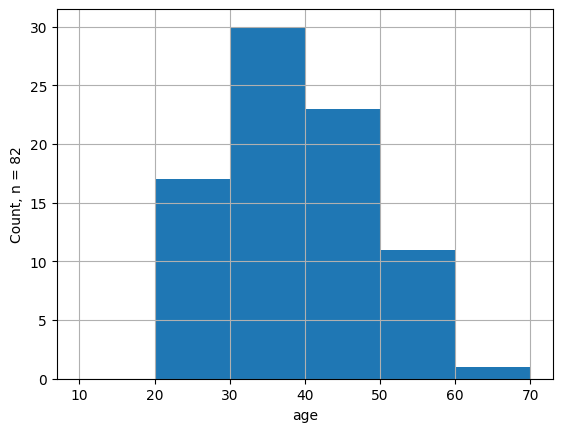

In [33]:
df['age'].hist(bins = bins)
plt.xlabel('age')
plt.ylabel('Count, n = ' + str(n))

Text(0, 0.5, '%, n = 82')

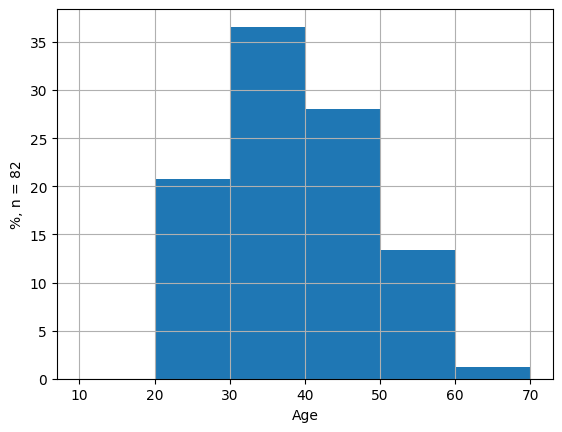

In [34]:
df['age'].hist(bins = bins, weights = np.ones(n) / n * 100)

plt.xlabel('Age')
plt.ylabel('%, n = ' + str(n))

In [39]:
df4 = pd.crosstab(df['age_group'], df['gender'], normalize= 'columns') * 100
df4.columns = ['Male', 'Female']
df4.style.format({'Male': '{:.1f} %', 'Female': '{:.1f} %'})

,Male,Female
age_group,,
"(10, 20]",1.6 %,0.0 %
"(20, 30]",28.6 %,5.3 %
"(30, 40]",38.1 %,57.9 %
"(40, 50]",20.6 %,15.8 %
"(50, 60]",9.5 %,21.1 %
"(60, 70]",1.6 %,0.0 %


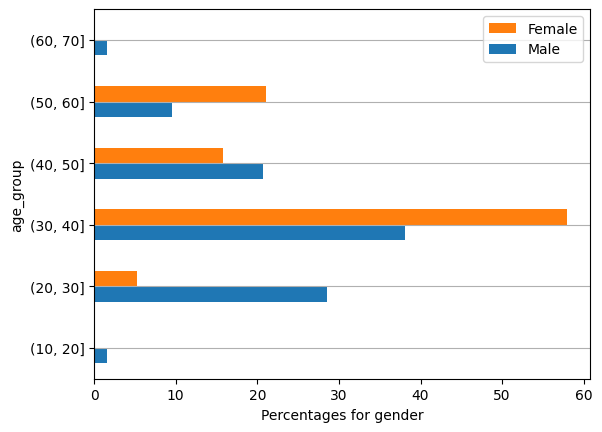

In [40]:
df4.plot.barh(legend = 'reverse')
plt.xlabel('Percentages for gender')
plt.grid(axis= 'y')

In [44]:
df5 = pd.crosstab(df['age'], df['gender'])
df5.columns = ['Man', 'Woman']
df5

,Man,Woman
age,,
20,1,0
21,2,0
22,1,1
24,1,0
25,1,0
26,3,0
27,2,0
28,2,0
29,3,0


In [43]:
from scipy.stats import chi2_contingency

chi2_contingency(df5)

Chi2ContingencyResult(statistic=34.252297410192156, pvalue=0.5518786182736067, dof=36, expected_freq=array([[0.76829268, 0.23170732],
       [1.53658537, 0.46341463],
       [1.53658537, 0.46341463],
       [0.76829268, 0.23170732],
       [0.76829268, 0.23170732],
       [2.30487805, 0.69512195],
       [1.53658537, 0.46341463],
       [1.53658537, 0.46341463],
       [2.30487805, 0.69512195],
       [2.30487805, 0.69512195],
       [3.07317073, 0.92682927],
       [0.76829268, 0.23170732],
       [3.07317073, 0.92682927],
       [1.53658537, 0.46341463],
       [3.07317073, 0.92682927],
       [1.53658537, 0.46341463],
       [3.07317073, 0.92682927],
       [2.30487805, 0.69512195],
       [2.30487805, 0.69512195],
       [6.14634146, 1.85365854],
       [0.76829268, 0.23170732],
       [1.53658537, 0.46341463],
       [0.76829268, 0.23170732],
       [3.07317073, 0.92682927],
       [2.30487805, 0.69512195],
       [0.76829268, 0.23170732],
       [1.53658537, 0.46341463],
       [